In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


In [ ]:
data=pd.read_csv("/Downloads/archive (3)/job_descriptions.csv")
data.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [3]:
data.shape

(1615940, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [5]:
data.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

In [6]:
data["Company Profile"] = data["Company Profile"].fillna("No Company Profile")

In [7]:
data.isnull().sum()

Job Id              0
Experience          0
Qualifications      0
Salary Range        0
location            0
Country             0
latitude            0
longitude           0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Contact Person      0
Contact             0
Job Title           0
Role                0
Job Portal          0
Job Description     0
Benefits            0
skills              0
Responsibilities    0
Company             0
Company Profile     0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
salary_numeric = pd.to_numeric(data['Salary Range'], errors='coerce')


negative_salaries = salary_numeric[salary_numeric < 0]
print(f"Number of negative salaries: {len(negative_salaries)}")
if len(negative_salaries) > 0:
    print("Negative salary values:")
    print(negative_salaries)

Number of negative salaries: 0


In [10]:
def clean_text(s):
    if pd.isna(s):
        return ""
    s = str(s)
    s = s.lower()  
    s = re.sub(r'\r\n|\r|\n', ' ', s)  
    s = re.sub(r'https?://\S+', '', s) 
    s = re.sub(r'\S+@\S+', '', s)       
    s = re.sub(r'\b\d+\b', '', s)      
    s = re.sub(r'[^a-zA-ZÀ-ÿ\u0600-\u06FF ]', ' ', s)  
    s = re.sub(r'\s+', ' ', s).strip() 
    return s

text_cols = ['Job Title', 'Job Description', 'skills', 'Responsibilities', 'Company Profile']
for col in text_cols:
    data[col] = data[col].astype(str).map(clean_text)

In [11]:
data = data[data["Job Description"].str.strip() != ""]


In [ ]:
data.to_csv("/Downloads/job_data_cleaned.csv", index=False)


In [ ]:
df=pd.read_csv("/Downloads/job_data_cleaned.csv")
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,digital marketing specialist,Social Media Manager,Snagajob,social media managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...",social media platforms e g facebook twitter in...,manage and grow social media accounts create e...,Icahn Enterprises,sector diversified industry diversified financ...
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,web developer,Frontend Web Developer,Idealist,frontend web developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...",html css javascript frontend frameworks e g re...,design and code user interfaces for websites e...,PNC Financial Services Group,sector financial services industry commercial ...
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,operations manager,Quality Control Manager,Jobs2Careers,quality control managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",quality control processes and methodologies st...,establish and enforce quality control standard...,United Services Automobile Assn.,sector insurance industry insurance property a...
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,network engineer,Wireless Network Engineer,FlexJobs,wireless network engineers design implement an...,"{'Transportation Benefits, Professional Develo...",wireless network design and architecture wi fi...,design configure and optimize wireless network...,Hess,sector energy industry mining crude oil produc...
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,event manager,Conference Manager,Jobs2Careers,a conference manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",event planning conference logistics budget man...,specialize in conference and convention planni...,Cairn Energy,sector energy industry energy oil gas explorat...


In [3]:
df["combined_text"] = (
    df["Job Title"] + " " +
    df["Job Description"] + " " +
    df["skills"] + " " +
    df["Responsibilities"]
)


In [4]:
skills_list = ["python", "sql", "excel", "machine learning", "power bi"]

def extract_skills(text):
    text = text.lower()
    return [skill for skill in skills_list if skill in text]

df["job_skills"] = df["combined_text"].map(extract_skills)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
job_vectors = vectorizer.fit_transform(df["combined_text"])


In [6]:
from sklearn.cluster import KMeans

k = 8   
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(job_vectors)


In [7]:
for i in range(k):
    print(f"Cluster {i} ")
    print(df[df["cluster"] == i]["Job Title"].head(10))
    print("\n")


Cluster 0 
3          network engineer
4             event manager
9           wedding planner
19            hr generalist
20          legal assistant
24         purchasing agent
25         purchasing agent
31            event planner
41    systems administrator
59    it support specialist
Name: Job Title, dtype: object


Cluster 1 
0      digital marketing specialist
15                    brand manager
17         social media coordinator
18       email marketing specialist
36                 technical writer
43     digital marketing specialist
87                    brand manager
103                      copywriter
105    digital marketing specialist
112    digital marketing specialist
Name: Job Title, dtype: object


Cluster 2 
6                 teacher
14        account manager
22       account director
26       sales consultant
40      account executive
42       account director
51          sales manager
55    key account manager
57        account manager
60           art director
N

In [8]:
from collections import Counter

cluster_skills = {}

for i in range(k):
    skills_text = " ".join(df[df["cluster"] == i]["skills"].astype(str))
    words = skills_text.lower().split()
    common = Counter(words).most_common(10)
    cluster_skills[i] = common

cluster_skills


{0: [('and', 354545),
  ('management', 288775),
  ('communication', 187829),
  ('skills', 153399),
  ('legal', 115565),
  ('planning', 90525),
  ('problem', 80137),
  ('solving', 76682),
  ('e', 73711),
  ('coordination', 73135)],
 1: [('and', 209669),
  ('marketing', 171156),
  ('content', 135656),
  ('analytics', 122998),
  ('seo', 111237),
  ('media', 108370),
  ('social', 101371),
  ('analysis', 101263),
  ('e', 97783),
  ('g', 97783)],
 2: [('and', 243632),
  ('management', 225573),
  ('sales', 171001),
  ('analysis', 103848),
  ('skills', 100197),
  ('customer', 79817),
  ('development', 79749),
  ('relationship', 76479),
  ('communication', 72728),
  ('negotiation', 69481)],
 3: [('design', 412941),
  ('and', 319064),
  ('user', 156608),
  ('e', 122101),
  ('g', 111598),
  ('principles', 93670),
  ('tools', 79907),
  ('ui', 69710),
  ('testing', 66204),
  ('prototyping', 65869)],
 4: [('data', 294472),
  ('and', 224678),
  ('analysis', 172537),
  ('e', 124890),
  ('g', 124890),


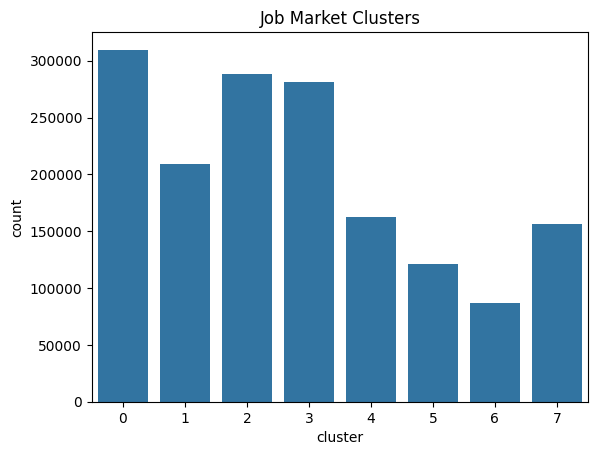

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="cluster")
plt.title("Job Market Clusters")
plt.show()


In [10]:
from collections import Counter
from wordcloud import WordCloud
import os

sns.set(style="whitegrid")

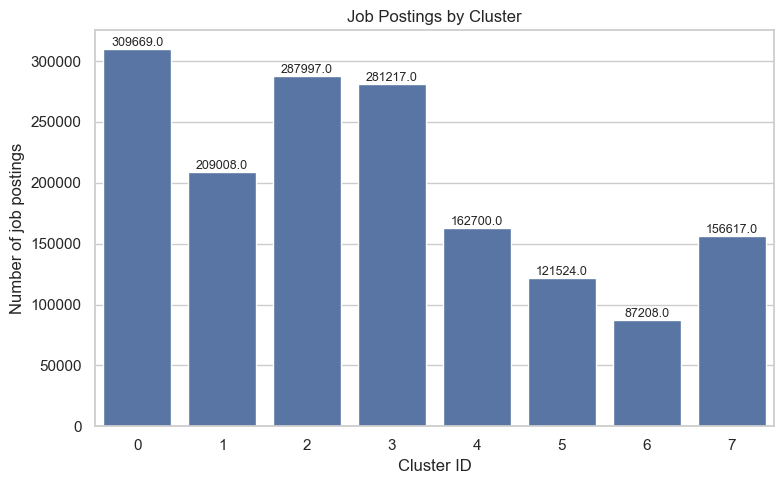

In [12]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x="cluster", order=sorted(df["cluster"].unique()))
ax.set_title("Job Postings by Cluster")
ax.set_xlabel("Cluster ID")
ax.set_ylabel("Number of job postings")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig("cluster_distribution.png", dpi=150)
plt.show()

In [11]:
def top_skills_for_cluster(cluster_id, n=15):
    texts = df[df["cluster"] == cluster_id]["skills"].dropna().astype(str)
    words = []
    for t in texts:
        if ',' in t:
            parts = [w.strip().lower() for w in t.split(',') if w.strip()!='']
        else:
            parts = [w.strip().lower() for w in t.split() if w.strip()!='']
        words.extend(parts)
    counter = Counter(words)
    return counter.most_common(n)

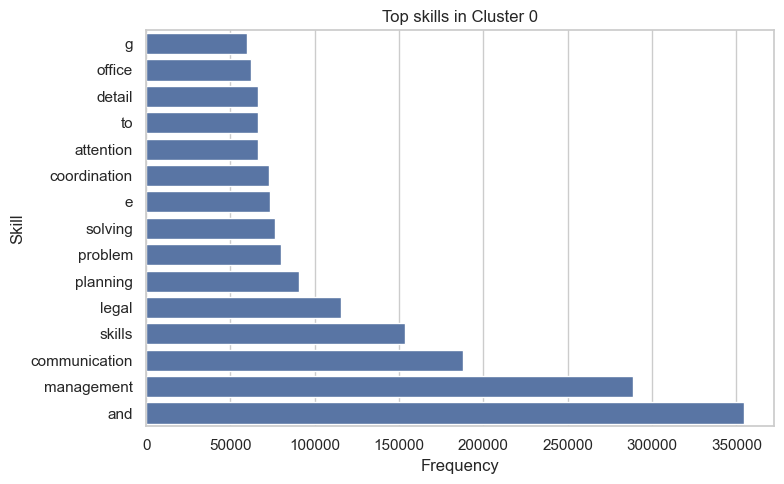

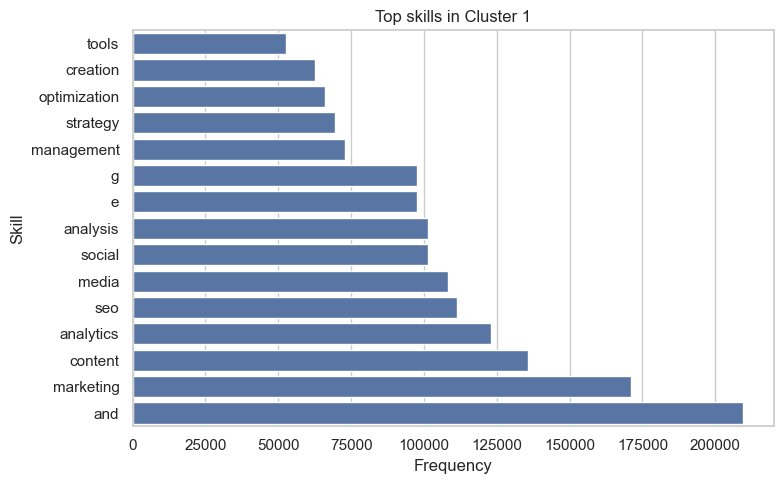

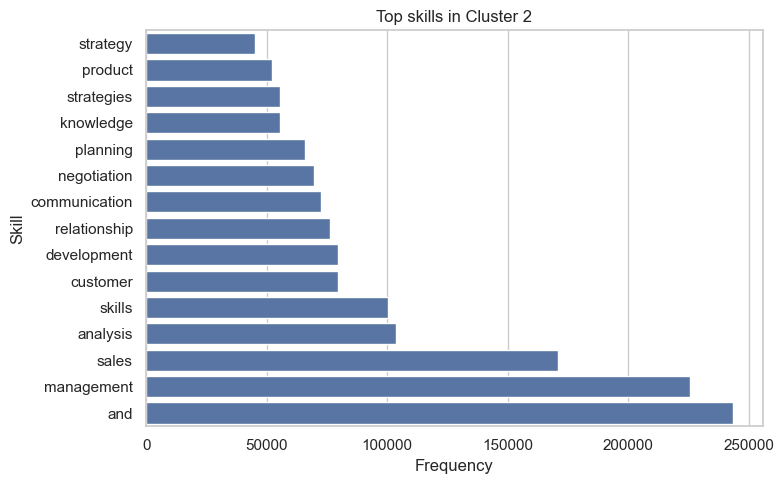

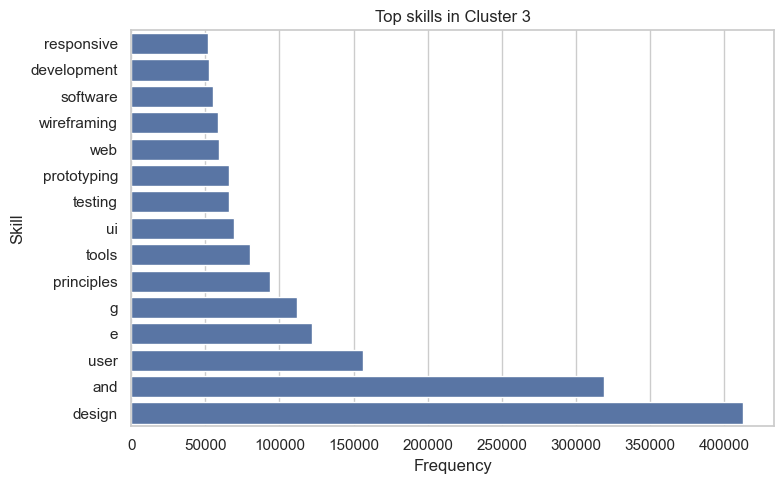

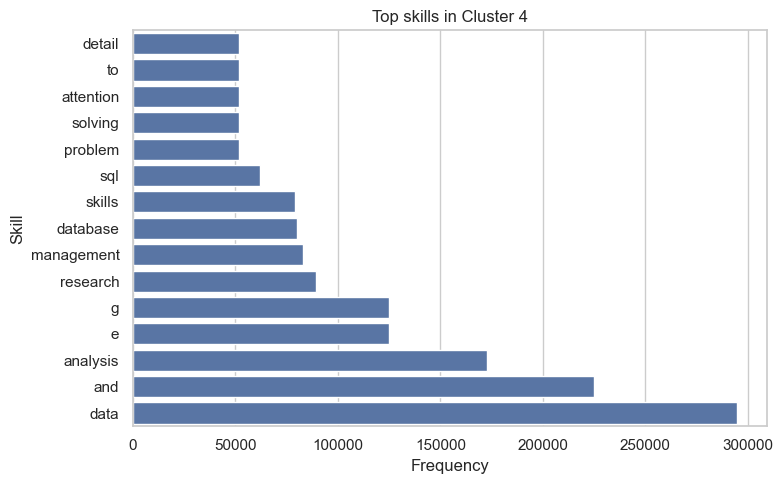

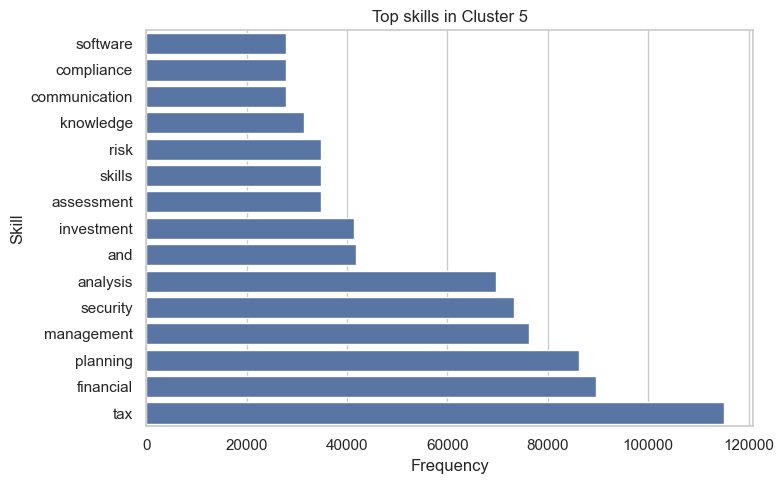

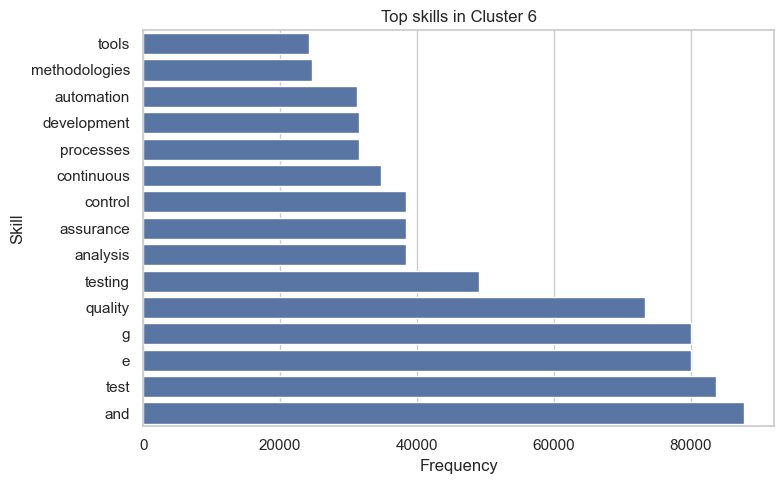

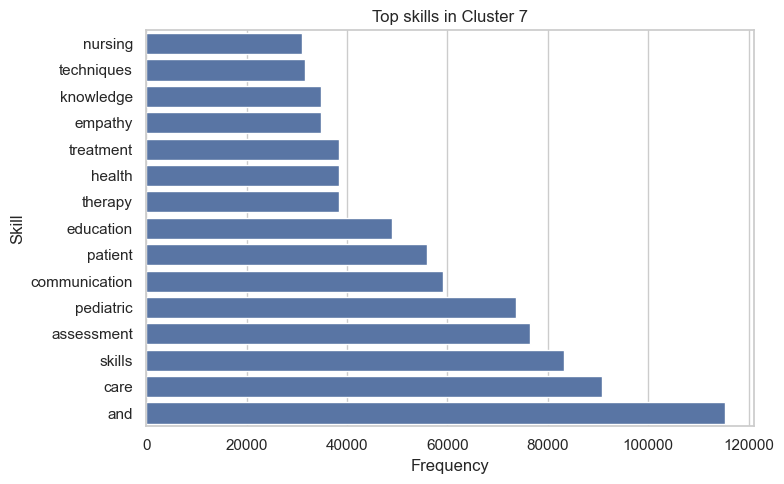

In [12]:
os.makedirs("cluster_skill_charts", exist_ok=True)

for c in sorted(df["cluster"].unique()):
    topn = top_skills_for_cluster(c, n=15)
    if not topn:
        continue
    skills, counts = zip(*topn)
    plt.figure(figsize=(8,5))
    sns.barplot(x=list(counts)[::-1], y=list(skills)[::-1])
    plt.title(f"Top skills in Cluster {c}")
    plt.xlabel("Frequency")
    plt.ylabel("Skill")
    plt.tight_layout()
    fname = f"cluster_skill_charts/cluster_{c}_top_skills.png"
    plt.savefig(fname, dpi=150)
    plt.show()


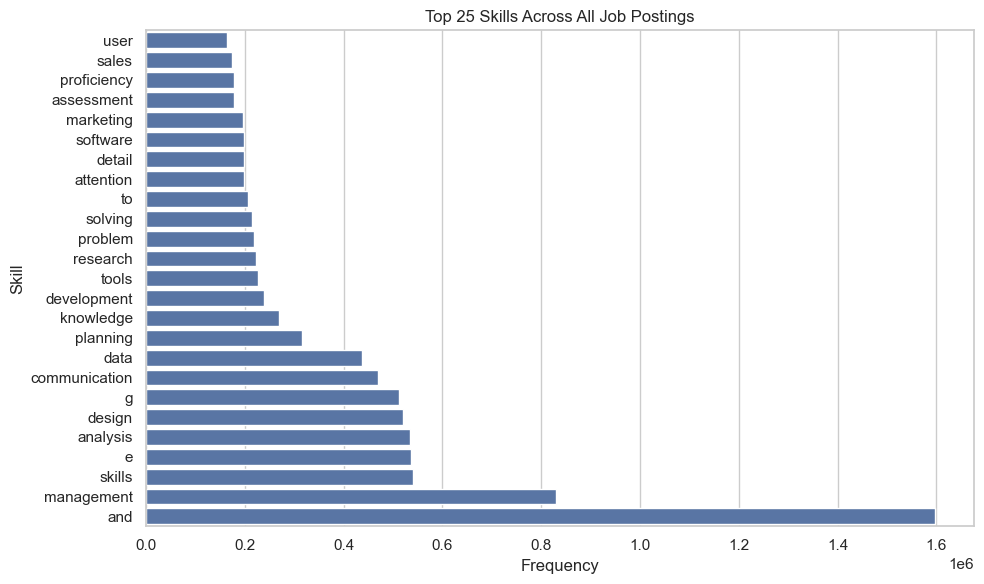

In [14]:
all_skills_text = df["skills"].dropna().astype(str).str.cat(sep=" ")
# split items
if ',' in all_skills_text:
    all_skills = [w.strip().lower() for w in all_skills_text.split(',') if w.strip()!='']
else:
    all_skills = [w.strip().lower() for w in all_skills_text.split() if w.strip()!='']
overall_counts = Counter(all_skills).most_common(25)
skills, counts = zip(*overall_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts)[::-1], y=list(skills)[::-1])
plt.title("Top 25 Skills Across All Job Postings")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.savefig("top_skills_overall.png", dpi=150)
plt.show()

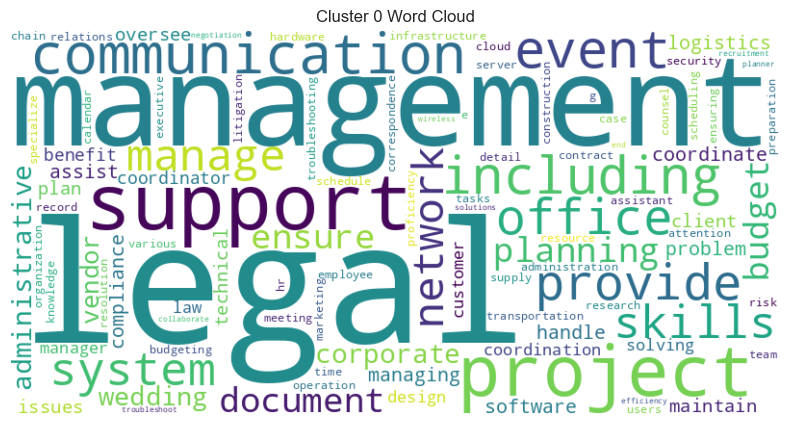

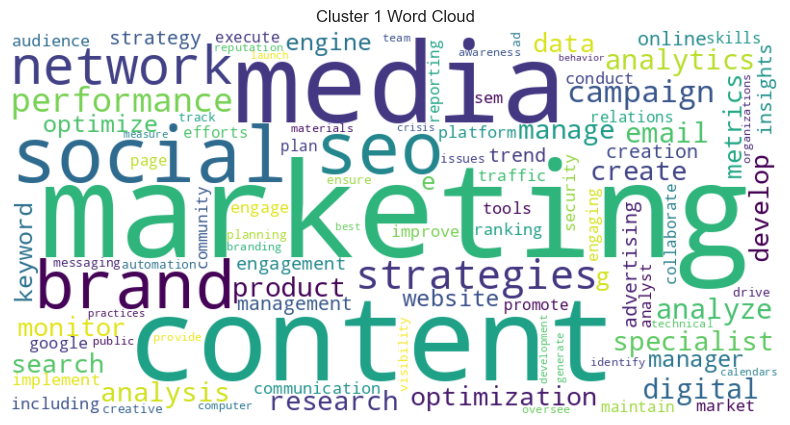

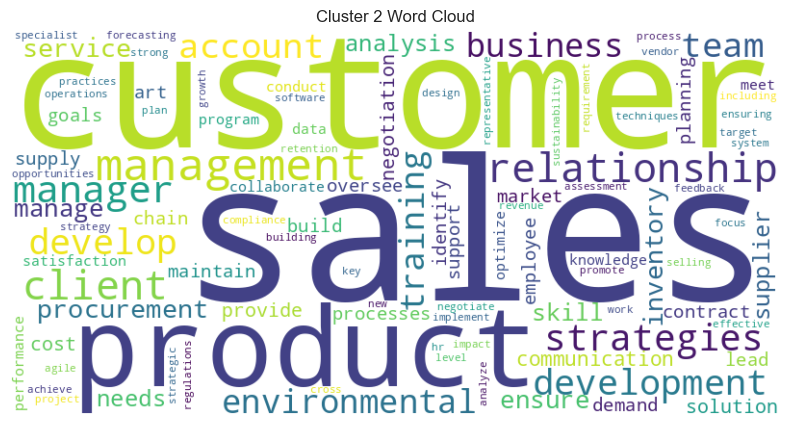

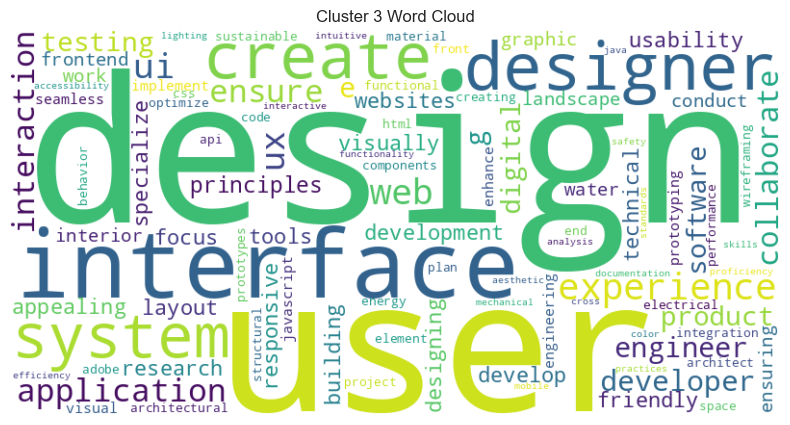

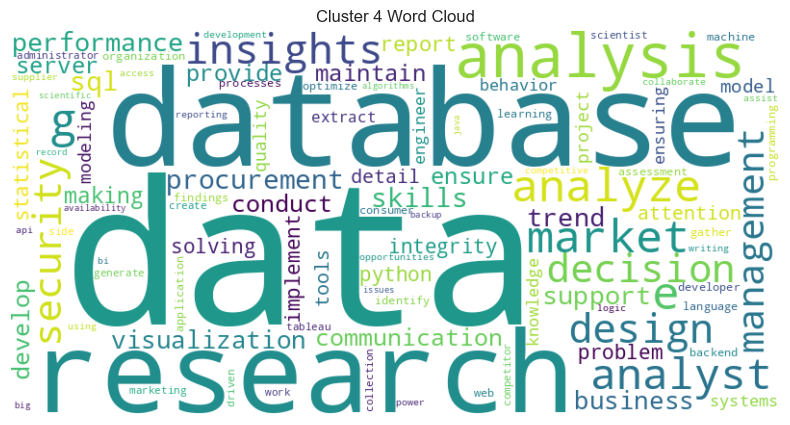

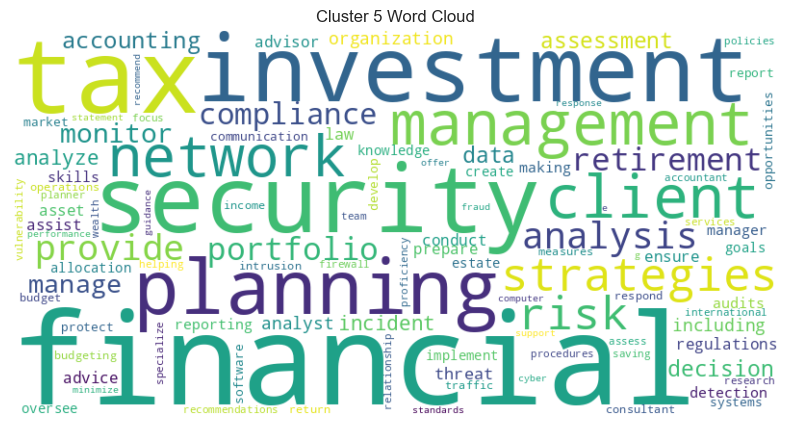

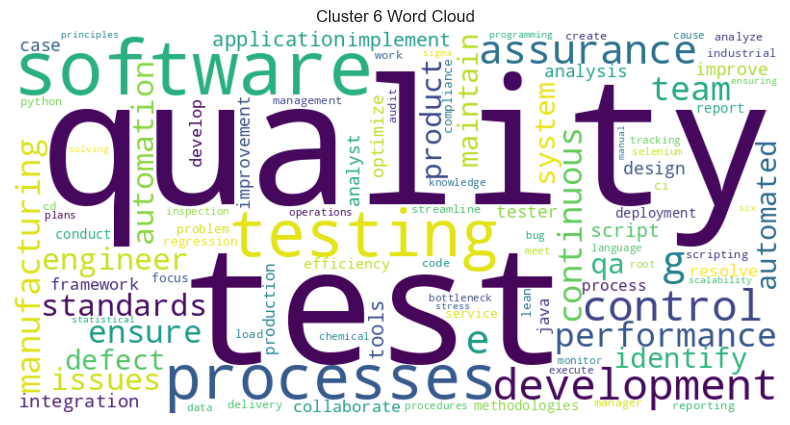

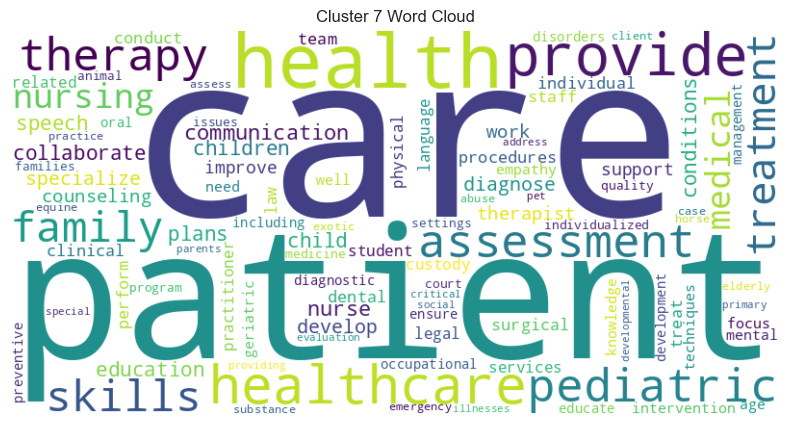

In [13]:
os.makedirs("cluster_wordclouds", exist_ok=True)
for c in sorted(df["cluster"].unique()):
    text = " ".join(df[df["cluster"] == c]["combined_text"].dropna().astype(str).tolist())
    if not text.strip():
        continue
    wc = WordCloud(width=800, height=400, background_color="white", collocations=False, max_words=100).generate(text)
    plt.figure(figsize=(12,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {c} Word Cloud")
    fname = f"cluster_wordclouds/cluster_{c}_wordcloud.png"
    plt.savefig(fname, dpi=150, bbox_inches="tight")
    plt.show()